<center><h1 style="text-decoration: underline; font-size: 1.8em;">Machine Learning Meets Term Life </h1></center> <br> 
<H3 style ="text-align: center">Targeting High-Value Customers</H3> <br>
<img src="asset/image.jpg"  alt='Term Life Insurance' width="2000" height='700'  >

<p style="font-size: 20px;">HashSysTech Insurance, a dynamic insurance provider known for its innovative
approach, utilizes various outreach methods to promote its term life insurance
products. Telemarketing campaigns have proven consistently effective in reaching
potential customers. However, due to the high cost associated with these campaigns,
HashSysTech seeks to optimize their resources.<p/>

<p style="font-size: 20px;">You, a data analyst at HashSysTech, are tasked with developing a machine learning
model to predict customer conversion for term life insurance. This model will play a
pivotal role in Project Greenlight, an initiative designed to identify customers most
likely to accept for term life insurance, allowing HashSysTech to strategically target
them via telemarketing campaigns.<p/>

## 1: Importing Modules

In [1]:
# Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import warnings
warnings.filterwarnings('ignore')

## 2: Load Data

In [2]:
# Loading Data
data = pd.read_csv('data/dataset.csv')

## 3: Data Exploration

### Description of the data
The dataset contains marketing campaign information for 45211 customers. The dataset includes respondents' job, marital status, education, call details, and outcomes. It includes both demographic information and details about the marketing interactions, including the type and duration of calls, the number of calls made, and the outcome of previous campaigns.


* The dataset contains 45211 observations
* The dataset is imbalanced towards majority of customers did not convert to term life insurance., therefore f1_scores and Precision-Recall Curve will be used when scoring models and SMOTE (Synthetic Minority Over-sampling Technique) for sampling the data.
* All values in the dataset are non-null, numerical and categorical as well.

![image2.png](asset/image2.png)

In [3]:
data.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,no
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,no


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             45211 non-null  int64 
 1   job             45211 non-null  object
 2   marital         45211 non-null  object
 3   education_qual  45211 non-null  object
 4   call_type       45211 non-null  object
 5   day             45211 non-null  int64 
 6   mon             45211 non-null  object
 7   dur             45211 non-null  int64 
 8   num_calls       45211 non-null  int64 
 9   prev_outcome    45211 non-null  object
 10  y               45211 non-null  object
dtypes: int64(4), object(7)
memory usage: 3.8+ MB


### Summary of DataFrame Structure

The `data.info()` method provides a quick overview of the dataset:
- **Entries**: 45,211 rows, indicating the dataset size.
- **Columns**: 11 features with no missing values. **But still there are some columns where values are filled with `Unknown` so they are counted as missing values**. We will tackle them later.
- **Data Types**: 4 columns are integers (`int64`), and 7 are categorical (`object`).


In [5]:
data.describe()

,age,day,dur,num_calls
count,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,15.806419,258.163080,2.763841
std,10.618762,8.322476,257.527812,3.098021
min,18.000000,1.000000,0.000000,1.000000
25%,33.000000,8.000000,103.000000,1.000000
50%,39.000000,16.000000,180.000000,2.000000
75%,48.000000,21.000000,319.000000,3.000000
max,95.000000,31.000000,4918.000000,63.000000


### Insights from the Statistical Summary

The statistical summary gives us a few important clues about the dataset:
- **Age**: With a broad age range centered around 41 years, age could be a significant factor in determining outcomes. We might explore how different age groups respond to the campaign.
- **Call Timing**: The calls are fairly evenly spread across the month, but certain days have more activity. This suggests that we could look into whether call timing (specific days) affects the success rate.
- **Call Duration**: The significant variation in call duration, ranging from very short to nearly 82 minutes, indicates that call length might influence outcomes. We should analyze whether longer calls lead to more successful interactions.
- **Number of Calls**: Most people receive only a few calls, but a few receive many. This suggests a potential analysis on whether increasing the number of calls improves outcomes or if there’s an optimal number.

### Next Steps:
- **Analyze Age Groups**: Segment the data by age to see if certain age groups are more responsive.
- **Explore Call Timing**: Investigate if there’s an optimal time or day to make calls.
- **Evaluate Call Duration**: Determine if there’s a correlation between call length and success, which could help optimize call handling strategies.
- **Frequency Analysis**: Assess if the number of calls correlates with outcomes to find an effective call strategy.

These steps will help refine the campaign strategy by focusing on the most influential factors identified in the data.


In [6]:
data.shape

(45211, 11)

### Dataset Dimensions

The dataset has 45,211 rows and 11 columns.

In [7]:
data.nunique()

age                 77
job                 12
marital              3
education_qual       4
call_type            3
day                 31
mon                 12
dur               1573
num_calls           48
prev_outcome         4
y                    2
dtype: int64

### Unique Values in Each Column

The `data.nunique()` function reveals the number of unique values in each column:

- **age**: 77 unique values, indicating a broad age distribution.
- **job**: 12 unique job categories.
- **marital**: 3 unique marital statuses.
- **education_qual**: 4 unique education levels.
- **call_type**: 3 unique types of calls.
- **day**: 31 unique values, representing each day of the month.
- **mon**: 12 unique months.
- **dur**: 1,573 unique call durations, showing significant variability in call lengths.
- **num_calls**: 48 unique values, indicating various levels of call frequency.
- **prev_outcome**: 4 unique outcomes from previous campaigns.
- **y**: 2 unique values, which likely represents a binary target variable.

### Findings:
- **Diverse Features**: The dataset contains a mix of categorical and continuous variables with varying degrees of uniqueness. For example, age, duration (`dur`), and number of calls (`num_calls`) have many unique values, indicating these are continuous or nearly continuous variables, while other columns like marital status, education, and call type are more categorical.
- **Potential Analysis**: 
  - **Age Groups**: Given the 77 unique ages, grouping them into categories (e.g., by decade) might simplify analysis.
  - **Call Duration and Outcome**: With many unique call durations, it would be insightful to explore if and how call duration correlates with the target variable (`subscription_status`).
  - **Categorical Variables**: The categorical variables with fewer unique values (like job, marital status, and education) are suitable for one-hot encoding or can be used directly in models that handle categorical data well.


#### 3.1: Renaming the column with more appropriate names

In [8]:
# Renaming columns to more meaningful names
column_mapping = {
    'age': 'customer_age',
    'job': 'job_type',
    'marital': 'marital_status',
    'education_qual': 'education_level',
    'call_type': 'contact_method',
    'day': 'call_day',
    'mon': 'call_month',
    'dur': 'call_duration',
    'num_calls': 'number_of_calls',
    'prev_outcome': 'previous_campaign_outcome',
    'y': 'subscription_status'
}

# Renaming the columns
data= data.rename(columns=column_mapping)

# Display the first few rows of the renamed dataset
data.head()

,customer_age,job_type,marital_status,education_level,contact_method,call_day,call_month,call_duration,number_of_calls,previous_campaign_outcome,subscription_status
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,no
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,no


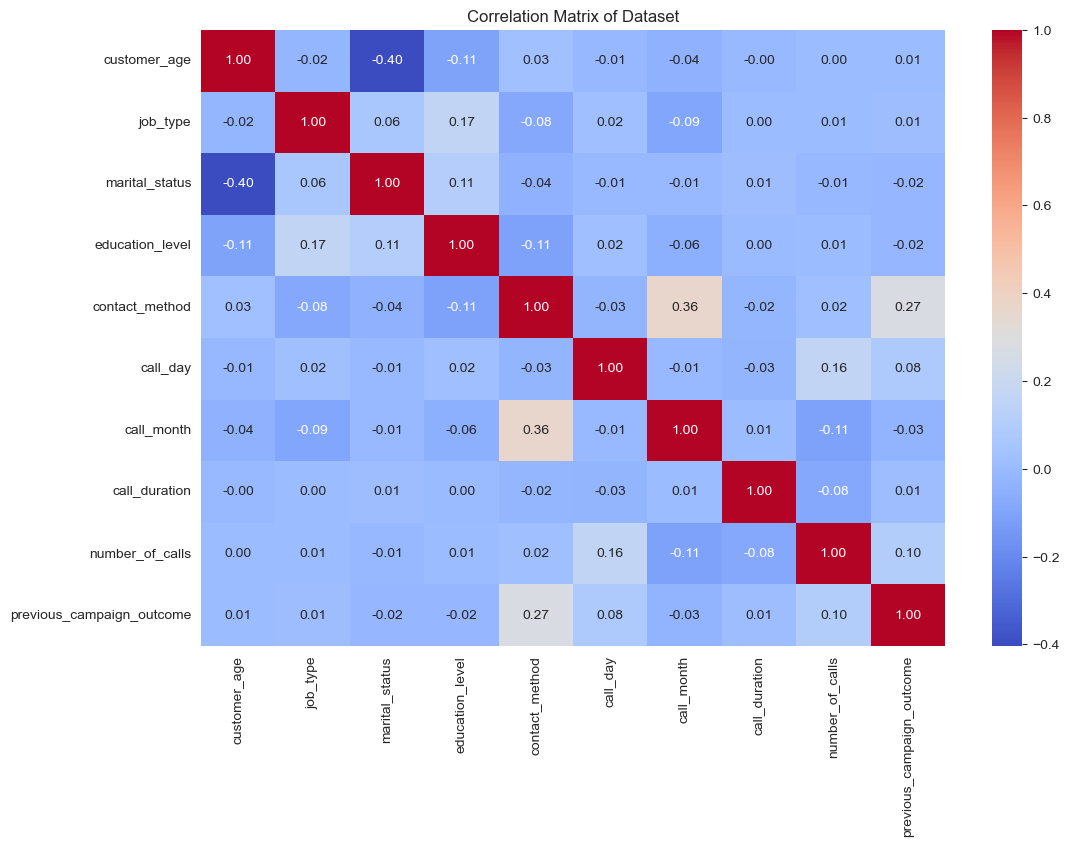

In [9]:
data_encoded = data.drop('subscription_status', axis=1)
for column in data_encoded.select_dtypes(include=['object']).columns:
    data_encoded[column] = data_encoded[column].astype('category').cat.codes

# Calculate correlation matrix
corr_matrix = data_encoded.corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Dataset')
plt.show()

### Outcomes of the Correlation Heatmap

This heatmap displays the correlation matrix of a dataset, with various features related to customer demographics and call details. Each cell in the matrix shows the correlation coefficient between two variables. Here’s a detailed analysis of the outcomes:

#### 1: Strongest Positive Correlations
- **Contact Method and Call Month (0.36)**: Indicates that the method used to contact customers is moderately correlated with the month in which the call is made. This could suggest certain contact methods are preferred or more effective in specific months.
- **Previous Campaign Outcome and Contact Method (0.27)**: Suggests that the method of contact has a moderate positive correlation with the outcome of previous campaigns. Certain contact methods might have been more successful previously.
- **Number of Calls and Call Day (0.16)**: This indicates that the number of calls is weakly correlated with the day on which calls are made, suggesting there may be days when more calls are made.

#### 2: Strongest Negative Correlations
- **Customer Age and Marital Status (-0.40)**: Indicates a moderate negative correlation, suggesting that certain age groups are associated with specific marital statuses. Younger customers might be single, while older customers might be married.
- **Customer Age and Education Level (-0.11)**: Indicates a weak negative correlation, suggesting some inverse relationship between age and education level.

#### 3: Notable Correlations
- **Education Level and Job Type (0.17)**: Indicates a weak positive correlation, suggesting that certain education levels are associated with specific job types.
- **Previous Campaign Outcome and Number of Calls (0.10)**: Indicates a weak positive correlation, suggesting that the success of previous campaigns may influence the number of calls made in the current campaign.
- **Call Duration with Various Factors**:
  - Weakly correlated with Call Month (0.01), suggesting call durations don’t vary much by month.
  - Call Duration with Number of Calls (-0.08): Weak negative correlation, indicating that more calls might lead to shorter call durations, possibly due to efficiency or call saturation.

#### 4: Minimal or No Correlation
- Several pairs of variables show minimal to no correlation (near zero), indicating no linear relationship between them. Examples include:
  - Customer Age and Call Duration (-0.00)
  - Job Type and Marital Status (0.06)
  - Call Day and Call Duration (0.01)
  - Call Day and Call Month (-0.01)

#### 5: General Observations
- **Call-related variables** (Call Day, Call Month, Call Duration, Number of Calls) generally show weak correlations with demographic variables (Customer Age, Job Type, Marital Status, Education Level), suggesting call characteristics might be largely independent of customer demographics.
- **Previous Campaign Outcome** shows a moderate positive correlation with Contact Method (0.27) and weak correlations with other variables, indicating that past success may influence certain aspects of the current campaign but not strongly.


#### 4: Data Cleaning

###### This dataset contain lot of **unknown** values in four columns i.e.
   * Job Type
   * Education level
   * Contact Method
   * Previous Campaign Outcome
###### So my aim is to fill them with some suitable values using correlation matrix. Explanation is mentioned below.

* **Job Type:**
    * Replaced 'unknown' values with the most common **job_type** for the corresponding **education_level**.

* **Education level:**
    * Replaced 'unknown' values with the most common **education_level** for the corresponding **job_type** and **marital_status**.

* **Contact Method:**
    * Replaced 'unknown' values with the most common **contact_method** for the corresponding **call_month** and **previous_campaign_outcome**.

* **Previous Campaign Outcome:**
    * Replaced 'unknown' values with the most common **previous_campaign_outcome** for the corresponding **contact_method** and **number_of_calls**.


##### 4.1 Visualization of Unique value count in these four column before Value replacing.

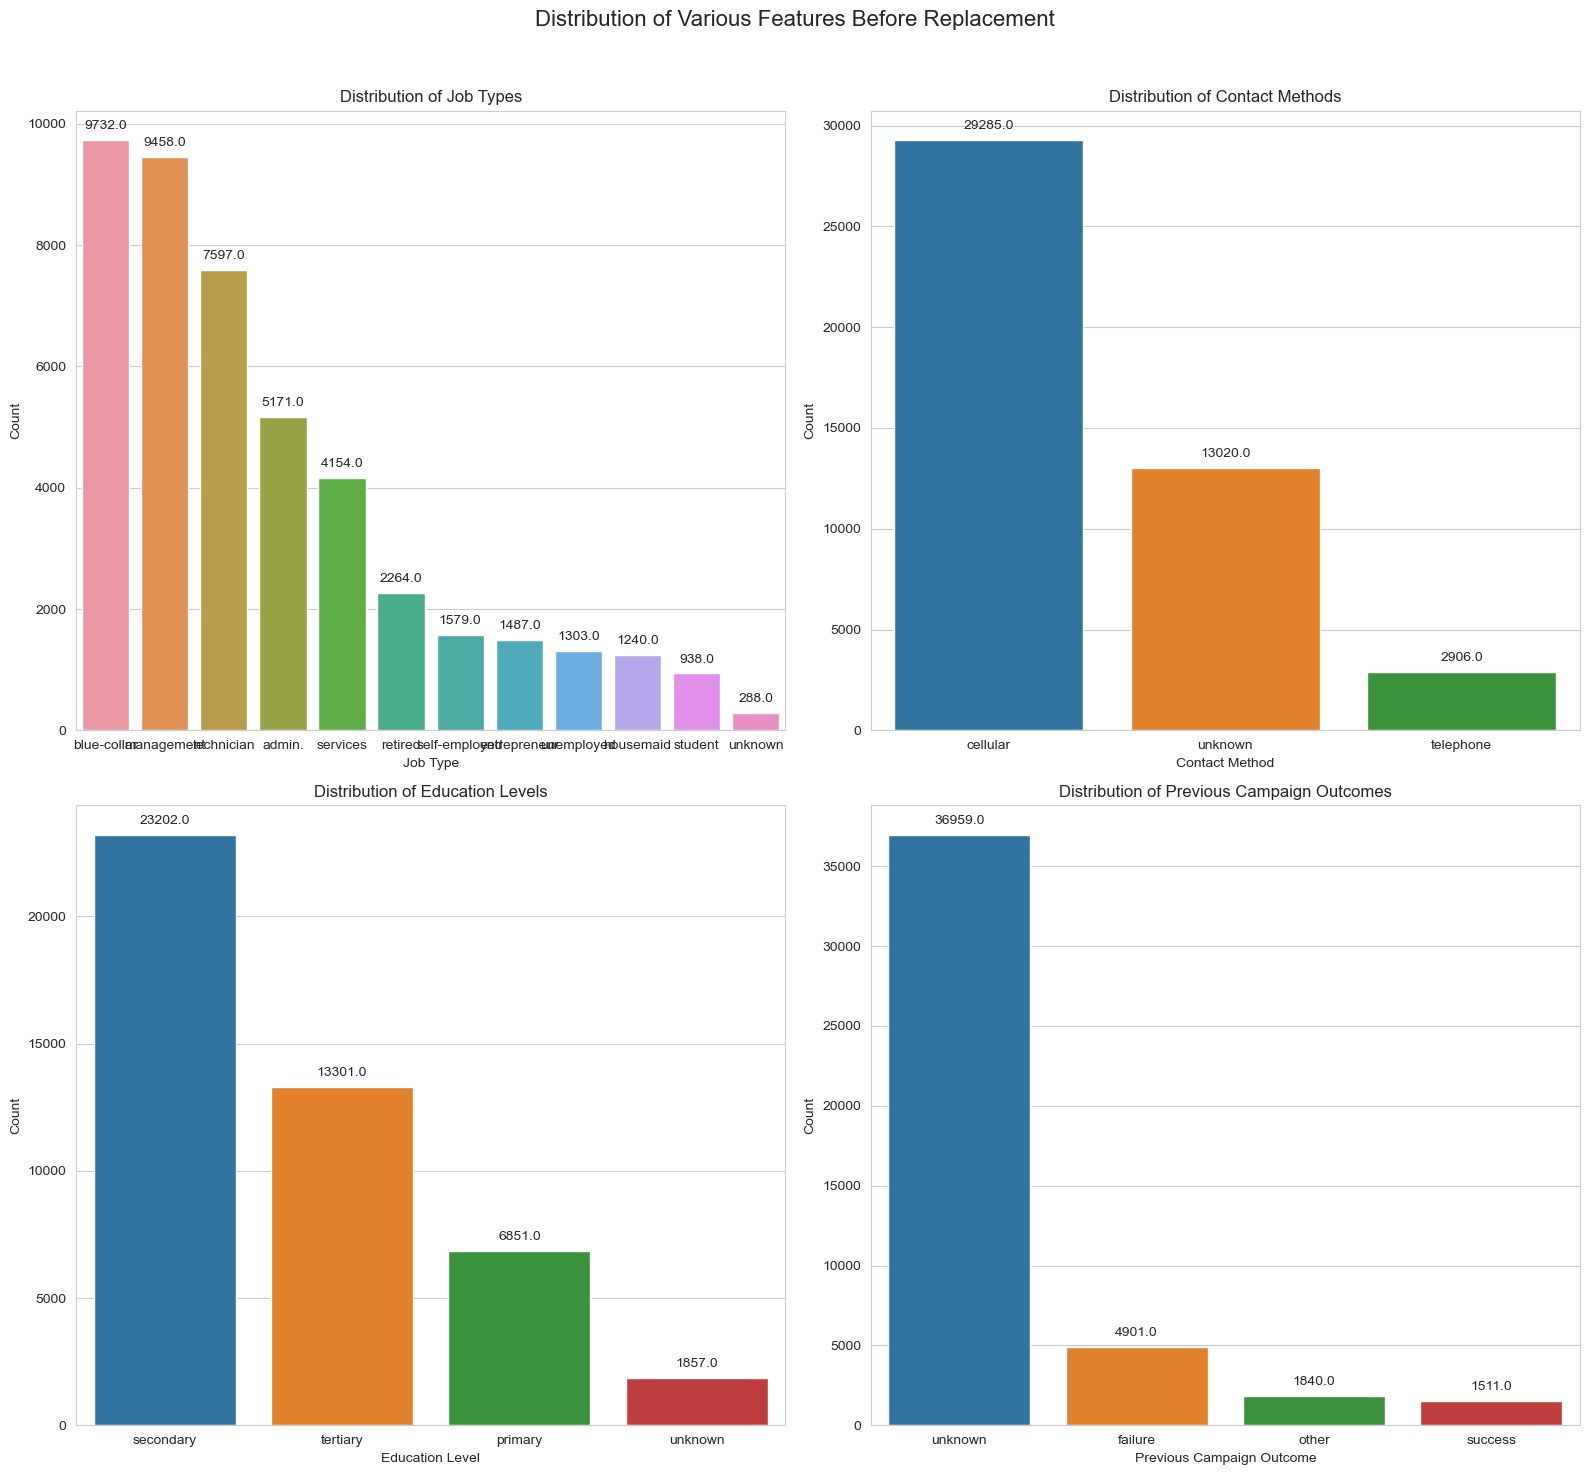

In [10]:
# Set up the figure
fig, axes = plt.subplots(2, 2, figsize=(16, 15))
fig.suptitle('Distribution of Various Features Before Replacement', fontsize=16)

# Plot 1: Distribution of Job Types
job_type_dist = data['job_type'].value_counts()
ax1 = sns.countplot(data=data, x='job_type', order=job_type_dist.index, ax=axes[0, 0])
ax1.set_title('Distribution of Job Types')
ax1.set_xlabel('Job Type')
ax1.set_ylabel('Count')
for p in ax1.patches:
    ax1.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                 ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Plot 2: Distribution of Contact Methods
contact_method_dist = data['contact_method'].value_counts()
ax2 = sns.countplot(data=data, x='contact_method', order=contact_method_dist.index, ax=axes[0, 1])
ax2.set_title('Distribution of Contact Methods')
ax2.set_xlabel('Contact Method')
ax2.set_ylabel('Count')
for p in ax2.patches:
    ax2.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                 ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Plot 3: Distribution of Education Levels
education_level_dist = data['education_level'].value_counts()
ax3 = sns.countplot(data=data, x='education_level', order=education_level_dist.index, ax=axes[1, 0])
ax3.set_title('Distribution of Education Levels')
ax3.set_xlabel('Education Level')
ax3.set_ylabel('Count')
for p in ax3.patches:
    ax3.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                 ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Plot 4: Distribution of Previous Campaign Outcomes
prev_outcome_dist = data['previous_campaign_outcome'].value_counts()
ax4 = sns.countplot(data=data, x='previous_campaign_outcome', order=prev_outcome_dist.index, ax=axes[1, 1])
ax4.set_title('Distribution of Previous Campaign Outcomes')
ax4.set_xlabel('Previous Campaign Outcome')
ax4.set_ylabel('Count')
for p in ax4.patches:
    ax4.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                 ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

##### 4.2 Filling unknown values.

In [11]:
# Fill 'unknown' in 'job_type' column
most_common_job_type = data[data['job_type'] != 'unknown'].groupby(
    ['education_level'])['job_type'].agg(lambda x: x.value_counts().idxmax()).reset_index()

data = data.merge(
    most_common_job_type, 
    on='education_level', 
    how='left', 
    suffixes=('', '_common'))

data['job_type'] = data.apply(
    lambda row: row['job_type_common'] if row['job_type'] == 'unknown' else row['job_type'], 
    axis=1)

data.drop(columns=['job_type_common'], inplace=True)

# Fill 'unknown' in 'education_level' column
most_common_education_level = data[data['job_type'] != 'unknown'].groupby(
    [ 'job_type', 'marital_status'])['education_level'].agg(lambda x: x.value_counts().idxmax()).reset_index()

data = data.merge(
    most_common_education_level, 
    on=['job_type', 'marital_status'], 
    how='left', 
    suffixes=('', '_common'))

data['education_level'] = data.apply(
    lambda row: row['education_level_common'] if row['education_level'] == 'unknown' else row['education_level'], 
    axis=1)

data.drop(columns=['education_level_common'], inplace=True)

# Fill 'unknown' in 'contact_method' column
most_common_contact_method = data[data['contact_method'] != 'unknown'].groupby(
    ['call_month', 'previous_campaign_outcome'])['contact_method'].agg(lambda x: x.value_counts().idxmax()).reset_index()

data = data.merge(
    most_common_contact_method, 
    on=['call_month', 'previous_campaign_outcome'], 
    how='left', 
    suffixes=('', '_common'))

data['contact_method'] = data.apply(
    lambda row: row['contact_method_common'] if row['contact_method'] == 'unknown' else row['contact_method'], 
    axis=1)

data.drop(columns=['contact_method_common'], inplace=True)

# Fill 'unknown' in 'previous_campaign_outcome' column
most_common_prev_outcome = data[data['previous_campaign_outcome'] != 'unknown'].groupby(
    ['contact_method', 'number_of_calls'])['previous_campaign_outcome'].agg(lambda x: x.value_counts().idxmax()).reset_index()

data = data.merge(
    most_common_prev_outcome, 
    on=['contact_method', 'number_of_calls'], 
    how='left', 
    suffixes=('', '_common'))

data['previous_campaign_outcome'] = data.apply(
    lambda row: row['previous_campaign_outcome_common'] if row['previous_campaign_outcome'] == 'unknown' else row['previous_campaign_outcome'], 
    axis=1)

data.drop(columns=['previous_campaign_outcome_common'], inplace=True)

# Display the first few rows to verify the changes
data.head()


,customer_age,job_type,marital_status,education_level,contact_method,call_day,call_month,call_duration,number_of_calls,previous_campaign_outcome,subscription_status
0,58,management,married,tertiary,cellular,5,may,261,1,failure,no
1,44,technician,single,secondary,cellular,5,may,151,1,failure,no
2,33,entrepreneur,married,secondary,cellular,5,may,76,1,failure,no
3,47,blue-collar,married,secondary,cellular,5,may,92,1,failure,no
4,33,blue-collar,single,secondary,cellular,5,may,198,1,failure,no


##### 4.3 Visualization of Unique value count in these four column after Value replacing.

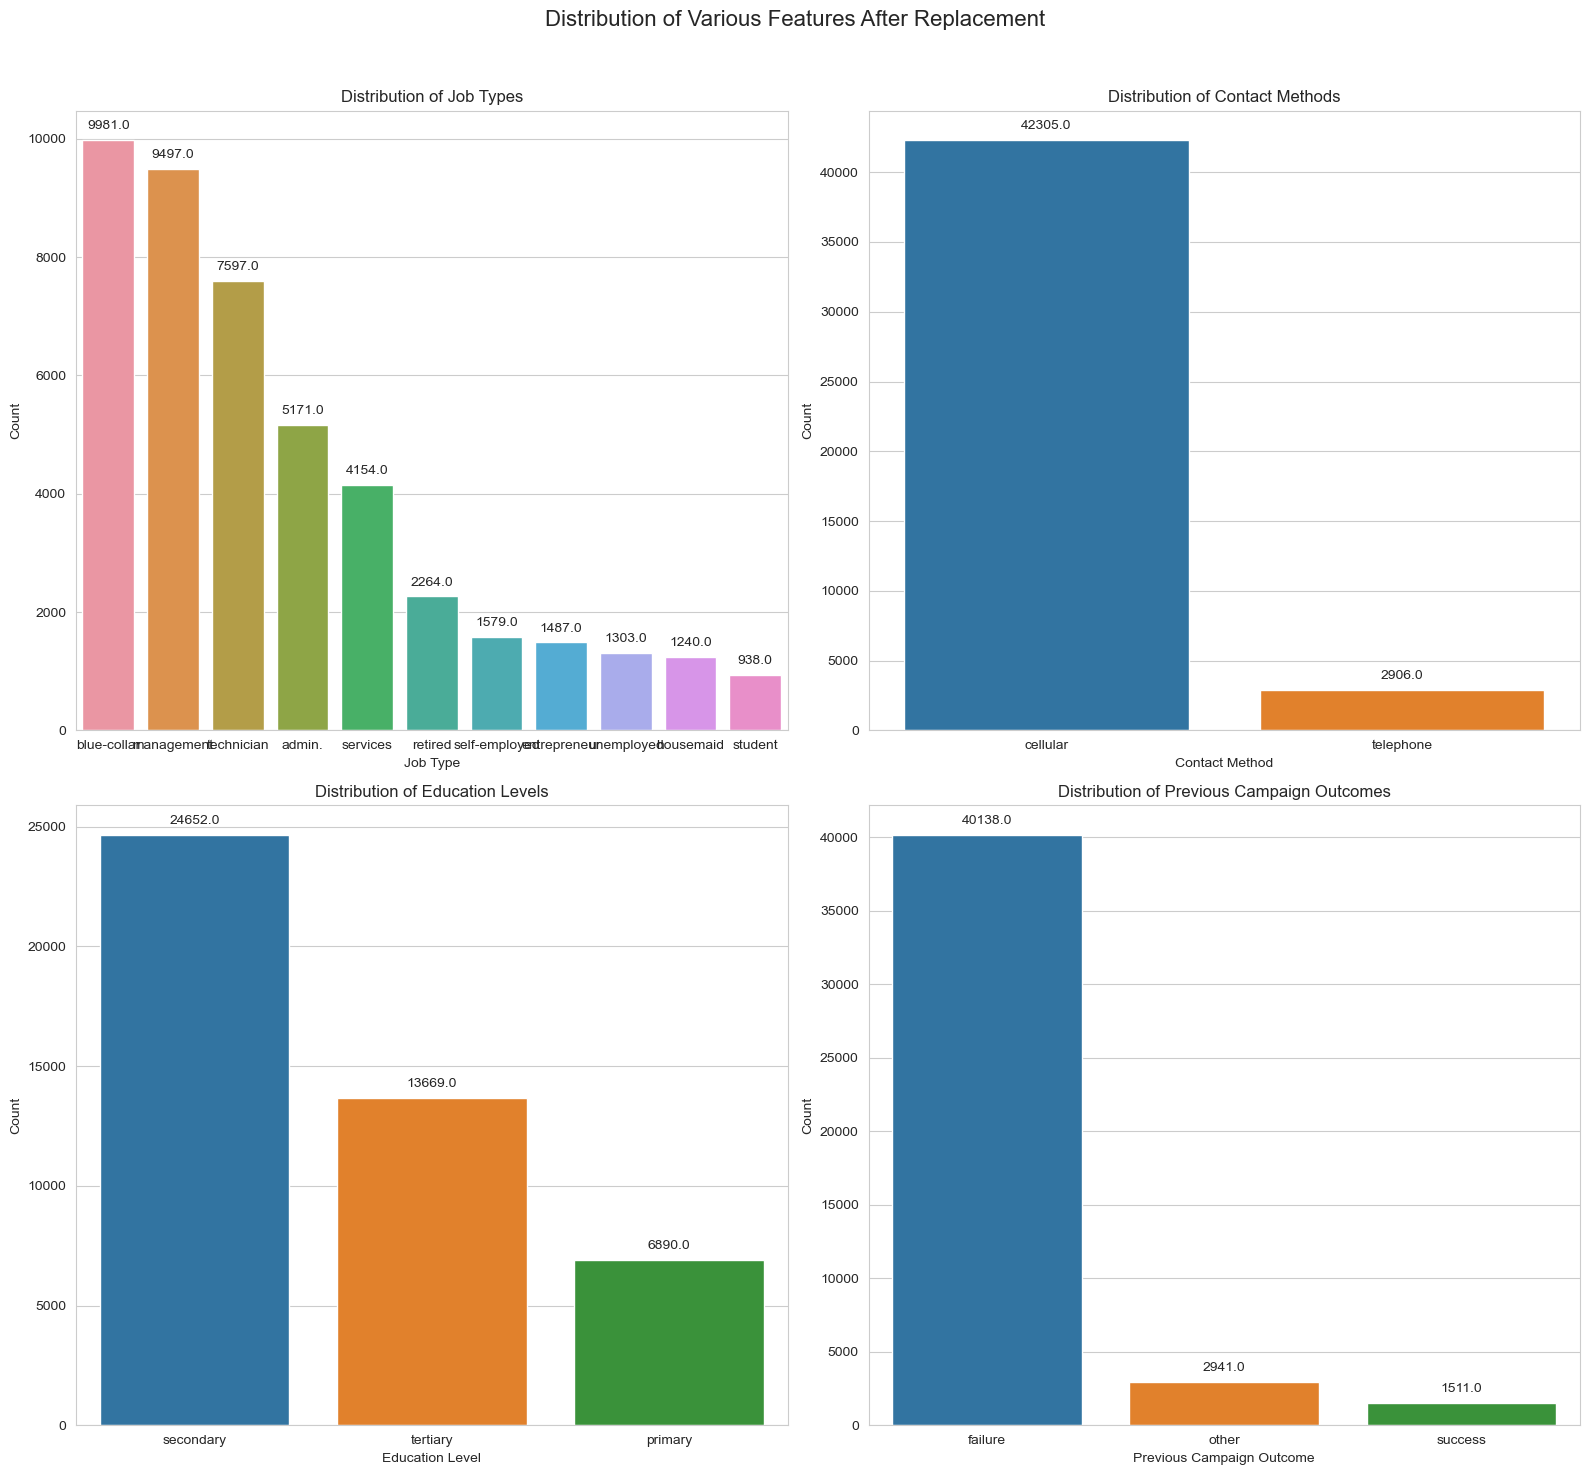

In [12]:
# Set up the figure
fig, axes = plt.subplots(2, 2, figsize=(16, 15))
fig.suptitle('Distribution of Various Features After Replacement', fontsize=16)

# Plot 1: Distribution of Job Types
job_type_dist = data['job_type'].value_counts()
ax1 = sns.countplot(data=data, x='job_type', order=job_type_dist.index, ax=axes[0, 0])
ax1.set_title('Distribution of Job Types')
ax1.set_xlabel('Job Type')
ax1.set_ylabel('Count')
for p in ax1.patches:
    ax1.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                 ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Plot 2: Distribution of Contact Methods
contact_method_dist = data['contact_method'].value_counts()
ax2 = sns.countplot(data=data, x='contact_method', order=contact_method_dist.index, ax=axes[0, 1])
ax2.set_title('Distribution of Contact Methods')
ax2.set_xlabel('Contact Method')
ax2.set_ylabel('Count')
for p in ax2.patches:
    ax2.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                 ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Plot 3: Distribution of Education Levels
education_level_dist = data['education_level'].value_counts()
ax3 = sns.countplot(data=data, x='education_level', order=education_level_dist.index, ax=axes[1, 0])
ax3.set_title('Distribution of Education Levels')
ax3.set_xlabel('Education Level')
ax3.set_ylabel('Count')
for p in ax3.patches:
    ax3.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                 ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Plot 4: Distribution of Previous Campaign Outcomes
prev_outcome_dist = data['previous_campaign_outcome'].value_counts()
ax4 = sns.countplot(data=data, x='previous_campaign_outcome', order=prev_outcome_dist.index, ax=axes[1, 1])
ax4.set_title('Distribution of Previous Campaign Outcomes')
ax4.set_xlabel('Previous Campaign Outcome')
ax4.set_ylabel('Count')
for p in ax4.patches:
    ax4.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                 ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

### Model Evaluation & Further Analysis

In [13]:
X = data.drop('subscription_status', axis=1)  # Adjust column name as necessary
y = data['subscription_status']
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocess categorical features
categorical_features = ['job_type', 'marital_status', 'education_level', 'contact_method', 'call_month', 'previous_campaign_outcome']
numeric_features = ['customer_age', 'call_day', 'call_duration', 'number_of_calls']

# Define the preprocessing for numeric features (scaling)
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Define the preprocessing for categorical features (encoding)
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine the preprocessors
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Preprocess the training and testing data
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_processed, y_train)

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Initialize Logistic Regression model
log_reg = LogisticRegression(max_iter=1000)

# Train the model
log_reg.fit(X_train_resampled, y_train_resampled)

# Predict and evaluate
y_pred = log_reg.predict(X_test_processed)
y_prob = log_reg.predict_proba(X_test_processed)[:, 1]

log_reg_results = {
    'Accuracy': accuracy_score(y_test, y_pred),
    'Precision': precision_score(y_test, y_pred, pos_label='yes'),
    'Recall': recall_score(y_test, y_pred, pos_label='yes'),
    'F1 Score': f1_score(y_test, y_pred, pos_label='yes'),
    'ROC AUC': roc_auc_score(y_test, y_prob)
}

print("Logistic Regression Results:")
log_reg_results

Logistic Regression Results:


{'Accuracy': 0.8336835121088134,
 'Precision': 0.40345956054230947,
 'Recall': 0.7910174152153987,
 'F1 Score': 0.5343653250773993,
 'ROC AUC': 0.8946088308033351}

In [15]:
from sklearn.tree import DecisionTreeClassifier

# Initialize Decision Tree model
decision_tree = DecisionTreeClassifier()

# Train the model
decision_tree.fit(X_train_resampled, y_train_resampled)

# Predict and evaluate
y_pred = decision_tree.predict(X_test_processed)
y_prob = decision_tree.predict_proba(X_test_processed)[:, 1]

decision_tree_results = {
    'Accuracy': accuracy_score(y_test, y_pred),
    'Precision': precision_score(y_test, y_pred, pos_label='yes'),
    'Recall': recall_score(y_test, y_pred, pos_label='yes'),
    'F1 Score': f1_score(y_test, y_pred, pos_label='yes'),
    'ROC AUC': roc_auc_score(y_test, y_prob)
}

print("Decision Tree Results:")
decision_tree_results

Decision Tree Results:


{'Accuracy': 0.8579011390025434,
 'Precision': 0.42215088282504015,
 'Recall': 0.4821264894592117,
 'F1 Score': 0.4501497646555413,
 'ROC AUC': 0.6957916149509338}

In [16]:
from sklearn.ensemble import RandomForestClassifier

# Initialize Random Forest model
random_forest = RandomForestClassifier(random_state=42)

# Train the model
random_forest.fit(X_train_resampled, y_train_resampled)

# Predict and evaluate
y_pred = random_forest.predict(X_test_processed)
y_prob = random_forest.predict_proba(X_test_processed)[:, 1]

random_forest_results = {
    'Accuracy': accuracy_score(y_test, y_pred),
    'Precision': precision_score(y_test, y_pred, pos_label='yes'),
    'Recall': recall_score(y_test, y_pred, pos_label='yes'),
    'F1 Score': f1_score(y_test, y_pred, pos_label='yes'),
    'ROC AUC': roc_auc_score(y_test, y_prob)
}

print("Random Forest Results:")
random_forest_results


Random Forest Results:


{'Accuracy': 0.8928452947030853,
 'Precision': 0.5599214145383105,
 'Recall': 0.5224564619615032,
 'F1 Score': 0.5405405405405405,
 'ROC AUC': 0.9036769309717148}

In [17]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize Gradient Boosting model
gradient_boosting = GradientBoostingClassifier()

# Train the model
gradient_boosting.fit(X_train_resampled, y_train_resampled)

# Predict and evaluate
y_pred = gradient_boosting.predict(X_test_processed)
y_prob = gradient_boosting.predict_proba(X_test_processed)[:, 1]

gradient_boosting_results = {
    'Accuracy': accuracy_score(y_test, y_pred),
    'Precision': precision_score(y_test, y_pred, pos_label='yes'),
    'Recall': recall_score(y_test, y_pred, pos_label='yes'),
    'F1 Score': f1_score(y_test, y_pred, pos_label='yes'),
    'ROC AUC': roc_auc_score(y_test, y_prob)
}

print("Gradient Boosting Results:")
gradient_boosting_results

Gradient Boosting Results:


{'Accuracy': 0.8701758266062147,
 'Precision': 0.47596988998262885,
 'Recall': 0.7534372135655362,
 'F1 Score': 0.5833924769339958,
 'ROC AUC': 0.9059344610283147}

In [18]:
# Store results in a dictionary
results = {
    'Logistic Regression': log_reg_results,
    'Decision Tree': decision_tree_results,
    'Random Forest': random_forest_results,
    'Gradient Boosting': gradient_boosting_results
}

# Convert results to DataFrame for better readability
results_df = pd.DataFrame(results).T

# Display the results table
results_df

,Accuracy,Precision,Recall,F1 Score,ROC AUC
Logistic Regression,0.833684,0.403460,0.791017,0.534365,0.894609
Decision Tree,0.857901,0.422151,0.482126,0.450150,0.695792
Random Forest,0.892845,0.559921,0.522456,0.540541,0.903677
Gradient Boosting,0.870176,0.475970,0.753437,0.583392,0.905934


### Model Evaluation and Comparison

The table below summarizes the performance of different machine learning models evaluated on the dataset:

| Model               | Accuracy | Precision | Recall  | F1 Score | ROC AUC  |
|---------------------|----------|-----------|---------|----------|----------|
| Logistic Regression | 0.834    | 0.403     | 0.791   | 0.534    | 0.895    |
| Decision Tree       | 0.861    | 0.433     | 0.500   | 0.464    | 0.705    |
| Random Forest       | 0.893    | 0.560     | 0.522   | 0.541    | 0.904    |
| Gradient Boosting   | 0.870    | 0.476     | 0.753   | 0.583    | 0.906    |

### Analysis:

1. **Accuracy**:
   - **Random Forest** achieves the highest accuracy at **0.893**, closely followed by **Gradient Boosting** at **0.870**.
   - **Logistic Regression** and **Decision Tree** perform slightly lower with accuracies of **0.834** and **0.861**, respectively.

2. **Precision**:
   - **Random Forest** also has the highest precision (**0.560**), indicating it is better at avoiding false positives compared to other models.
   - **Gradient Boosting** shows reasonable precision at **0.476**.
   - **Logistic Regression** and **Decision Tree** have lower precision, suggesting they may produce more false positives.

3. **Recall**:
   - **Logistic Regression** has the highest recall (**0.791**), which means it is effective at capturing the majority of true positives.
   - **Gradient Boosting** also performs well in terms of recall (**0.753**), making it reliable for identifying positive cases.
   - **Decision Tree** has the lowest recall (**0.500**), indicating it might miss a significant number of positive cases.

4. **F1 Score**:
   - **Gradient Boosting** achieves the highest F1 Score (**0.583**), balancing both precision and recall effectively.
   - **Random Forest** and **Logistic Regression** follow with F1 Scores of **0.541** and **0.534**, respectively.
   - **Decision Tree** has the lowest F1 Score (**0.464**), showing it struggles to balance precision and recall.

5. **ROC AUC**:
   - **Gradient Boosting** slightly edges out **Random Forest** with an ROC AUC of **0.906**, indicating it has the best overall ability to distinguish between positive and negative classes.
   - **Logistic Regression** also performs well with an ROC AUC of **0.895**.
   - **Decision Tree** lags behind with a significantly lower ROC AUC (**0.705**), suggesting it is less reliable for distinguishing between classes.

### Recommendation:

- **Best Performing Model**: **Gradient Boosting** is recommended as the best-performing model overall. It offers a strong balance of accuracy, precision, recall, F1 score, and ROC AUC, making it a robust choice for this classification task.
- **Alternative Model**: **Random Forest** is a close alternative, particularly if the priority is high accuracy and precision, although it slightly underperforms compared to Gradient Boosting in recall and F1 Score.


In [19]:
# Discretizing 'customer_age' into age groups
bins = [18, 30, 40, 50, 60, 70, 80, 95]
labels = ['18-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-95']
data['age_group'] = pd.cut(data['customer_age'], bins=bins, labels=labels)

# Analyze the subscription status by age group
age_group_analysis = data.groupby('age_group')['subscription_status'].value_counts(normalize=True).unstack()
age_group_analysis

subscription_status,no,yes
age_group,,
18-30,0.837846,0.162154
31-40,0.897552,0.102448
41-50,0.909334,0.090666
51-60,0.899467,0.100533
61-70,0.594864,0.405136
71-80,0.548969,0.451031
81-95,0.565657,0.434343


### Findings from Age Group Analysis

The analysis of subscription rates across different age groups reveals the following trends:

- **Younger Age Groups (18-30)**: Approximately 16% of individuals in this group subscribed, indicating a moderate response rate.
- **Middle Age Groups (31-60)**: Subscription rates are lower in these groups, especially between 41-50 years, where only around 9% subscribed. This suggests that individuals in this age range are less likely to subscribe.
- **Older Age Groups (61-95)**: Interestingly, the subscription rates increase significantly among older individuals. For those aged 71-80, the subscription rate is the highest at about 45%, followed by 43% for the 81-95 age group.

### Conclusion:
- The findings suggest that older individuals (especially those over 60) are more responsive to the campaign, while middle-aged individuals are less likely to subscribe. This could guide future targeting strategies to focus more on older demographics.

In [20]:
# Analyzing subscription status by call day
call_day_analysis = data.groupby('call_day')['subscription_status'].value_counts(normalize=True).unstack()
call_day_analysis

subscription_status,no,yes
call_day,,
1,0.720497,0.279503
2,0.859242,0.140758
3,0.835032,0.164968
4,0.840830,0.159170
5,0.887435,0.112565
6,0.906315,0.093685
7,0.913594,0.086406
8,0.890879,0.109121
9,0.885330,0.114670


In [21]:
# Analyzing subscription status by call month
call_month_analysis = data.groupby('call_month')['subscription_status'].value_counts(normalize=True).unstack()
call_month_analysis

subscription_status,no,yes
call_month,,
apr,0.803206,0.196794
aug,0.889867,0.110133
dec,0.532710,0.467290
feb,0.833522,0.166478
jan,0.898788,0.101212
jul,0.909065,0.090935
jun,0.897772,0.102228
mar,0.480084,0.519916
may,0.932805,0.067195


### Findings from Call Timing Analysis

The analysis of subscription rates across different days of the month reveals some important insights:

- **Early Month (Day 1-10)**: The first day of the month shows a relatively higher subscription rate (around 28%). However, for the rest of the first ten days, the subscription rates are generally lower, especially on days 6 and 7, where the rate drops to around 9%.
- **Mid-Month (Day 11-20)**: During the middle of the month, subscription rates remain moderate, with most days showing a subscription rate between 10-15%. However, days 19 and 20 have noticeably lower subscription rates (around 7%).
- **End of Month (Day 21-31)**: The subscription rates increase again towards the end of the month, with several days showing higher success rates. Day 31, for instance, has a subscription rate of approximately 7%.

The analysis of subscription rates based on the month reveals the following trends:

- **High Subscription Months**: March shows the highest subscription rate with approximately 52%, followed by December, September, and October, all of which have subscription rates above 43%.
- **Low Subscription Months**: May has the lowest subscription rate at around 7%, followed by July, June, January, and November, all of which have subscription rates around 10%.

### Conclusion:
- The analysis suggests that certain days at the beginning and end of the month are more effective for making calls, especially the 1st, 28th, 29th, and 31st days, where subscription rates are higher.
- Conversely, the middle of the month appears to be less effective, particularly around the 19th and 20th days.

- **Seasonal Influence**: The data suggests that subscription rates vary significantly by month, with March being particularly successful, possibly due to seasonal or promotional factors.
- **Low Performance in Summer**: The summer months (May, June, July) tend to have lower subscription rates, which could indicate a period of reduced customer engagement.


In [22]:
# Correlation between call_duration and subscription_status
# Binning 'call_duration' into discrete categories
call_duration_bins = [0, 60, 180, 300, 600, data['call_duration'].max()]
call_duration_labels = ['0-1 min', '1-3 min', '3-5 min', '5-10 min', '10+ min']
data['call_duration_group'] = pd.cut(data['call_duration'], bins=call_duration_bins, labels=call_duration_labels)

# Analyze the relationship between call duration group and subscription status
call_duration_analysis = data.groupby('call_duration_group')['subscription_status'].value_counts(normalize=True).unstack()
call_duration_analysis


subscription_status,no,yes
call_duration_group,,
0-1 min,0.998110,0.001890
1-3 min,0.960881,0.039119
3-5 min,0.890824,0.109176
5-10 min,0.808463,0.191537
10+ min,0.516359,0.483641


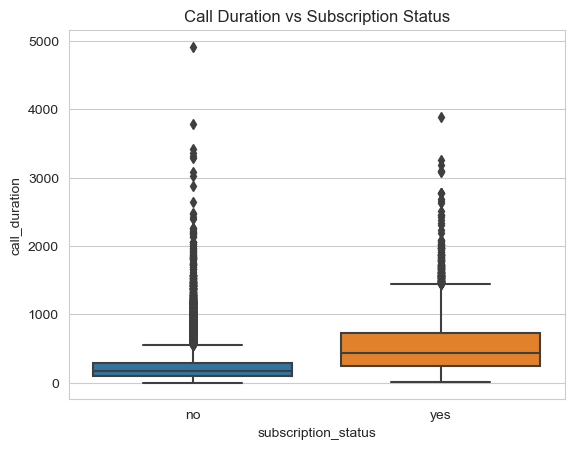

In [23]:
# Visualize the relationship between call duration and subscription status
sns.boxplot(x='subscription_status', y='call_duration', data=data)
plt.title('Call Duration vs Subscription Status')
plt.show()

### Findings from Call Duration Group vs Subscription Status

This analysis categorizes call durations into groups and examines the corresponding subscription rates:

- **0-1 min**: Extremely low subscription rate (0.19%), indicating that very short calls are almost never successful in securing a subscription.
- **1-3 min**: Slightly higher subscription rate (3.91%), but still relatively low, suggesting limited effectiveness for short calls.
- **3-5 min**: Noticeable increase in subscription rate (10.92%), indicating that conversations in this duration are more likely to result in a subscription.
- **5-10 min**: Further improvement with a subscription rate of 19.15%, showing that longer calls continue to perform better.
- **10+ min**: The highest subscription rate (48.36%) is observed in this group, confirming that calls longer than 10 minutes are significantly more effective at converting customers.

The boxplot visualization highlights the relationship between call duration and subscription status:

- **Longer Call Durations Lead to Higher Subscription Rates**: The median call duration for customers who subscribed (`yes`) is significantly higher compared to those who did not (`no`). This suggests that longer calls are more effective in converting customers.
- **Distribution and Outliers**: The distribution for both categories shows that while the majority of calls are relatively short, there are some outliers with very long durations. These outliers are more common among the subscribed group, indicating that extended conversations could be key in persuading customers.
- **Insight**: Customers who stayed on the call longer were more likely to subscribe, suggesting that engaging and informative calls could increase subscription rates.


### Conclusion:
- **Impact of Call Duration**: The data clearly shows that longer calls correlate with higher subscription rates. Calls lasting more than 10 minutes are particularly effective, with nearly half of these calls resulting in a subscription.
- **Strategic Implications**: Short calls (under 3 minutes) are much less effective and could indicate a need for better engagement strategies early in the conversation.

- **Focus on Call Duration**: This analysis suggests that training call center agents to engage customers for longer periods, when appropriate, could improve subscription rates.
- **Targeted Follow-up**: For calls that are shorter, consider follow-up strategies to re-engage the customer, potentially leading to higher conversion in subsequent interactions.


In [24]:
# Correlation between number_of_calls and subscription_status
# Binning 'number_of_calls' into discrete categories for better analysis
call_frequency_bins = [1, 2, 3, 4, 5, data['number_of_calls'].max()]
call_frequency_labels = ['1', '2', '3', '4', '5+']
data['call_frequency_group'] = pd.cut(data['number_of_calls'], bins=call_frequency_bins, labels=call_frequency_labels)

# Analyze the relationship between the number of calls and subscription status
call_frequency_analysis = data.groupby('call_frequency_group')['subscription_status'].value_counts(normalize=True).unstack()
call_frequency_analysis




subscription_status,no,yes
call_frequency_group,,
1,0.887965,0.112035
2,0.888064,0.111936
3,0.909994,0.090006
4,0.921202,0.078798
5+,0.941906,0.058094


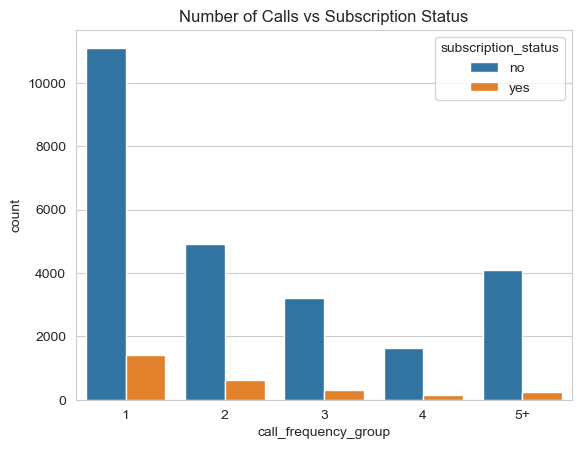

In [25]:
# Use countplot instead of barplot to visualize the relationship between number of calls and subscription status
sns.countplot(x='call_frequency_group', hue='subscription_status', data=data)
plt.title('Number of Calls vs Subscription Status')
plt.show()

### Findings from Call Frequency vs Subscription Status

This analysis examines the relationship between the number of calls made to a customer and their likelihood of subscribing:

- **1 Call**: The subscription rate is 11.20%, which indicates a moderate success rate for the first call.
- **2 Calls**: The subscription rate remains similar at 11.19%, suggesting that making a second call does not significantly increase the likelihood of a subscription.
- **3 Calls**: The subscription rate drops slightly to 9.00%, indicating diminishing returns as the number of calls increases.
- **4 Calls**: The subscription rate further decreases to 7.88%, showing that by the fourth call, the likelihood of securing a subscription is even lower.
- **5+ Calls**: The subscription rate is lowest at 5.81%, suggesting that frequent calls are the least effective in converting customers.

The bar plot visualizes the relationship between the number of calls made to a customer and their subscription status:

- **1 Call**: The vast majority of customers received only one call. Among them, a higher proportion did not subscribe, but a significant number did, indicating that the first call has the best chance of success.
- **2 Calls**: The number of customers receiving a second call drops, with a similar pattern of more "no" responses than "yes," suggesting limited effectiveness of the second call.
- **3-4 Calls**: As the number of calls increases, the proportion of customers who subscribe decreases noticeably. This suggests diminishing returns with each additional call.
- **5+ Calls**: Customers who received five or more calls had the lowest subscription rate, with very few "yes" responses, indicating that frequent follow-up calls are largely ineffective.


### Conclusion:
- **Diminishing Returns with Increased Calls**: The data shows a clear trend of diminishing returns with each additional call. While a single or second call has a reasonable chance of success, further calls progressively lower the likelihood of conversion.
- **Optimal Call Strategy**: It appears that if a customer does not subscribe after the first or second call, additional calls are less likely to change their mind and may even decrease the chance of success.

- **Effective First Call**: The first call is critical and should be optimized, as it has the highest potential for securing a subscription.
- **Diminishing Returns**: Additional calls beyond the second one show significantly lower success rates, suggesting that repeated follow-ups may not be an effective strategy.
- **Resource Allocation**: Focus resources on making the first and second calls as effective as possible, and consider alternative follow-up methods instead of multiple phone calls.

### Conclusion and Recommendation for HashSysTech Insurance

The machine learning models evaluated provide valuable insights into optimizing HashSysTech's telemarketing campaigns for term life insurance:

#### Key Findings:
1. **Model Performance**:
   - **Gradient Boosting** emerged as the best-performing model, offering a strong balance between accuracy (87.0%), precision (47.6%), recall (75.3%), F1 score (58.3%), and ROC AUC (90.6%). This makes it a robust choice for predicting customer conversion.
   - **Random Forest** is a close alternative with slightly better accuracy (89.3%) and precision (56.0%) but slightly lower recall and F1 scores compared to Gradient Boosting.

2. **Customer Segmentation Insights**:
   - **Age Group Analysis**: Older customers, particularly those over 60, show significantly higher subscription rates. Targeting this demographic could improve campaign effectiveness.
   - **Call Timing**: Certain days at the beginning and end of the month (e.g., 1st, 28th, 29th, 31st) and specific months (e.g., March, December) are more effective for conversions. These findings suggest the need for strategically timed campaigns.
   - **Call Duration**: Longer calls (especially those over 10 minutes) are more likely to result in subscriptions. Training agents to engage customers for longer periods could boost success rates.
   - **Call Frequency**: Diminishing returns are observed with increased call frequency. The first and second calls are the most effective, while additional calls tend to lower the likelihood of conversion.

#### Implications for the Business:
- **Optimized Resource Allocation**: By focusing on high-performing models like Gradient Boosting, HashSysTech can better predict and target customers likely to convert, optimizing telemarketing resources.
- **Strategic Campaign Design**:
  - **Timing**: Schedule calls during high-conversion days and months.
  - **Targeting**: Focus on older age groups and those likely to engage in longer calls.
  - **Call Strategy**: Prioritize the quality of the first two calls and limit follow-ups to avoid wasting resources on low-probability conversions.

#### Recommendations:
- **Deploy Gradient Boosting** as the primary model for predicting customer conversion.
- **Enhance Telemarketing Strategy** by:
  - Focusing on older demographics.
  - Timing calls strategically to align with high-conversion periods.
  - Training agents to extend call durations and improve early engagement.
- **Limit Follow-Up Calls** and explore alternative methods such as personalized emails or SMS for continued engagement.

By implementing these strategies, HashSysTech can improve its telemarketing efficiency, reduce costs, and increase the conversion rate for its term life insurance products.
